In [9]:
import tensorflow as tf
import serial
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
import base64
# ser = serial.Serial('COM5',115200,timeout=1)
im2 = ""


def load_images(i=0,n=10): # i = init  ,n = final of dataset
    # PATH = "./saved/img/im_28x28_140.png"
    
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # bin = cv2.imencode('png',im)
    
    return test_images[i:n], test_labels[i:n]


<p>verificar se está no devido formato<p/>

shape im: (10, 28, 28), shape label: (10,)


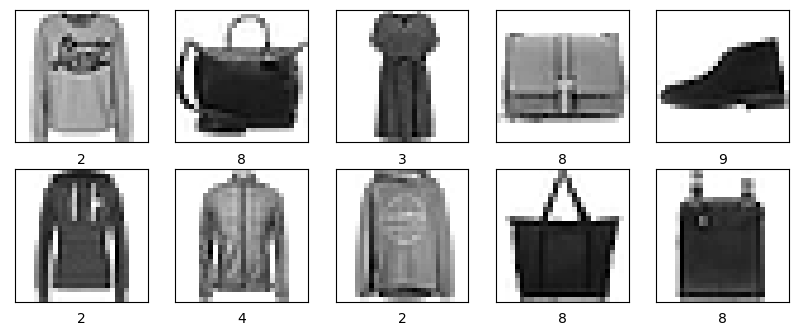

In [2]:
I = 520
N = 530
LENGHT = N-I

images, labels = load_images(I,N)
print(f'shape im: {images.shape}, shape label: {labels.shape}')

plt.figure(figsize=(10,10))
for i in range(LENGHT):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()


<p>converter imagem para base64, para envio <p/>

In [19]:
base = base64.b64encode(images[0]) #images[0].tobytes()
conv = base64.b64decode(base)
byte_img = np.ndarray([28,28],'uint8',conv)

In [21]:
print(f'base64: {base}')
print(f'bytes: {conv}')

base64: b'AAAAAAAAAAAAN1IAAAAAAE9SAAAAAAAAAAAAAAAAAAAAACRnemn1tKDSyLDfl3dtLgAAAAAAAAAAAAAAADaMbWRWSqq4vayZcVJpdIdnAAAAAAAAAAAAAAByaVxkX1JWkpeggVpfZl9hlDMAAAAAAAAAAAAsgVlfYWdZP0lPUlFeYl9pX3lnAAAAAAAAAAAARHRmWV5KYZQ+VlZWVk9hYmGHfAAAAAAAAAAAAFFnelJRTujHak5MWVSCdzF8hHkJAAAAAAAAAABaZIJaOpK9h/+tsr2w48fonXR1HwAAAAAAAAAAYmKKXzeVZM13QU4pWW2dhIVpdykAAAAAAAAAAGdfh2Qhp3V9crKZ4Kqknz6NYnQ3AAAAAAAAAARiXoFSV7SSl6K8hKSkymF0j15vQQAAAAAAAAAPYWp0jcDKus9hvIWCuN3wzYRcbUwAAAAAAAAAEWFsdHHKQXTNr5+XsOqkTDaUX2pZAAAAAAAAAAxeanxMQUwvTn+UgnJXOklXnV9nZwAAAAAAAAAbX2SFYlZZSUdEMzY3WmdWTqJfXnEAAAAAAAAAHF9ekmJJWUpWX15WUVxmX0ykalp0AQAAAAAAAB5aT490VFpKVFlZVFFZbGdJoHJSbxEAAAAAAAAfX2mld1JeSVRaWldRVmxtRp16THIeAAAAAAAAJFl1r3VXVEpZX1RXVFRkekeff0x3KQAAAAAAACteZrJ9V09OWV5UWVRXZHxMqolPaikAAAAAAAAxXFzFd1lRT1daVFxWWlx9YZSKUXcsAAAAAAAAPl9OvX1ZT1JZXFJXVllWd3dth1x0NwAAAAAAADpiTqh3X05SWVxUVlpaVml9X4VfdD4AAAAAAAA0ZFSfal9PVlpaWVlZWlpefFqSZHRBAAAAAAAANmxWnYFkSk5ST1ZWVlJaWoR3qGdsRgAAAAAAADN0Wp8uXm9vdHR1dXV0dXxkDJ9vckIAAAAAAAAkcmekAAAMIyEjIS

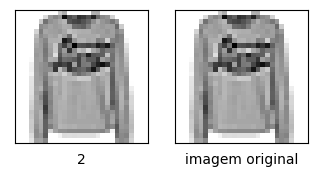

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(byte_img, cmap=plt.cm.binary)
plt.xlabel(labels[0])

plt.subplot(5,5,2)
plt.xticks([])
plt.yticks([])
plt.imshow(images[0], cmap=plt.cm.binary)
plt.xlabel('imagem original')
plt.show()

<p>enviar imagens e receber-as intactas!<p/>
<p>checar base64<p/>

In [23]:
ser = serial.Serial('COM5',115200,timeout=1)
ser.write(base)
ser.flush()
time.sleep(1)
print(ser.readline())
ser.close()

b'AAAAAAAAAAAAN1IAAAAAAE9SAAAAAAAAAAAAAAAAAAAAACRnemn1tKDSyLDfl3dtLgAAAAAAAAAAAAAAADaMbWRWSqq4vayZcVJpdIdnAAAAAAAAAAAAAAByaVxkX1JWkpeggVpfZl9hlDMAAAAAAAAAAAAsgVlfYWdZP0lPUlFeYl9pX3lnAAAAAAAAAAAARHRmWV5KYZQ+VlZWVk9hYmGHfAAAAAAAAAAAAFFnelJRTujHak5MWVSCdzF8hHkJAAAAAAAAAABaZIJaOpK9h/+tsr2w48fonXR1HwAAAAAAAAAAYmKKXzeVZM13QU4pWW2dhIVpdykAAAAAAAAAAGdfh2Qhp3V9crKZ4Kqknz6NYnQ3AAAAAAAAAARiXoFSV7SSl6K8hKSkymF0j15vQQAAAAAAAAAPYWp0jcDKus9hvIWCuN3wzYRcbUwAAAAAAAAAEWFsdHHKQXTNr5+XsOqkTDaUX2pZAAAAAAAAAAxeanxMQUwvTn+UgnJXOklXnV9nZwAAAAAAAAAbX2SFYlZZSUdEMzY3WmdWTqJfXnEAAAAAAAAAHF9ekmJJWUpWX15WUVxmX0ykalp0AQAAAAAAAB5aT490VFpKVFlZVFFZbGdJoHJSbxEAAAAAAAAfX2mld1JeSVRaWldRVmxtRp16THIeAAAAAAAAJFl1r3VXVEpZX1RXVFRkekeff0x3KQAAAAAAACteZrJ9V09OWV5UWVRXZHxMqolPaikAAAAAAAAxXFzFd1lRT1daVFxWWlx9YZSKUXcsAAAAAAAAPl9OvX1ZT1JZXFJXVllWd3dth1x0NwAAAAAAADpiTqh3X05SWVxUVlpaVml9X4VfdD4AAAAAAAA0ZFSfal9PVlpaWVlZWlpefFqSZHRBAAAAAAAANmxWnYFkSk5ST1ZWVlJaWoR3qGdsRgAAAAAAADN0Wp8uXm9vdHR1dXV0dXxkDJ9vckIAAAAAAAAkcmekAAAMIyEjISEhIRQAAA

<p>Desconsidere codigo abaixo</p>

In [7]:
# images_received = []
# try:
#     ser = serial.Serial('COM5',115200,timeout=1)
#     for i in range(1):
#         try:
        
#             ser.write(images[i].tobytes())
            
#             ser.flush()
#             time.sleep(1)
#         except:
#             print('erro no envio!')

#         #     while ser.inWaiting() :
#     # im2 = np.ndarray([28,28],'uint8',ser.readline())
#         try:
#             im2 = ser.readline()
#             conv = np.ndarray([28,28],'uint8',im2)
#             images_received.append(conv)
#             print(im2)
#         except:
#             print('erro na converção ou na leitura!')
# except:
#     ser.close()
# print('finish')

b'\x00\x00\x00\x00\x00\x00\x00\x00\x007R\x00\x00\x00\x00\x00OR\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00$gzi\xf5\xb4\xa0\xd2\xc8\xb0\xdf\x97wm.\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x006\x8cmdVJ\xaa\xb8\xbd\xac\x99qRit\x87g\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00ri\\d_RV\x92\x97\xa0\x81Z_f_a\x943\x00\x00\x00\x00\x00\x00\x00\x00\x00,\x81Y_agY?IORQ^b_i_yg\x00\x00\x00\x00\x00\x00\x00\x00\x00DtfY^Ja\x94>VVVVOaba\x87|\x00\x00\x00\x00\x00\x00\x00\x00\x00QgzRQN\xe8\xc7jNLYT\x82w1|\x84y\t\x00\x00\x00\x00\x00\x00\x00\x00Zd\x82Z:\x92\xbd\x87\xff\xad\xb2\xbd\xb0\xe3\xc7\xe8\x9dtu\x1f\x00\x00\x00\x00\x00\x00\x00\x00bb\x8a_7\x95d\xcdwAN)Ym\x9d\x84\x85iw)\x00\x00\x00\x00\x00\x00\x00\x00g_\x87d!\xa7u}r\xb2\x99\xe0\xaa\xa4\x9f>\x8dbt7\x00\x00\x00\x00\x00\x00\x00\x04b^\x81RW\xb4\x92\x97\xa2\xbc\x84\xa4\xa4\xcaat\x8f^oA\x00\x00\x00\x00\x00\x00\x00\x0fajt\x8d\xc0\xca\xba\xcfa\xbc\x85\x82\xb8\xdd\xf0\xcd\x84\\mL\x00\x00\x00\x00\x00\x00\x00\x11altq\xcaAt\xcd\xaf\x9f\x97\xb0\

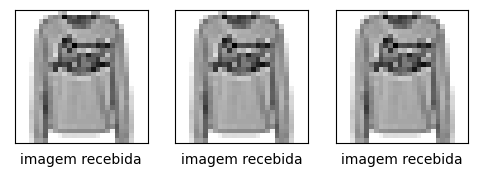

In [15]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_received[0], cmap=plt.cm.binary)
    plt.xlabel('imagem recebida')

plt.show()